In [1]:
# Import data from CSV file
# Practice-level data, range August 2010 to November 2019
# Other category (as per BNF 040304) contains venlafaxine, mirtazapine, and duloxetine

import pandas as pd
import numpy as np
import os
os.chdir("/Users/paulbogowicz/Documents/Research/Oxford University/OpenPrescribing - antidepressants/Data")

df1 = pd.read_csv("helen_antidepressants_to_2019_11.csv")
df1 = df1.rename(columns={"practice":"Practice","month":"Month","total_items":"Total","total_cost":"Cost","MAOi":"MAOI"})
print("No of practices: ", df1["Practice"].nunique())
df1.head()

No of practices:  8181


,Practice,Month,Other,Venlafaxine,Mirtazapine,Duloxetine,MAOI,Isocarboxazid,Iproniazid,Tranylcypromine,...,Tricyclics,Trimipramine,Dosulepin,Amitriptyline,Trazodone,Lofepramine,Maprotiline,Mianserin,Total,Cost
0,A81001,2010-08-01,32,17,13,1,0,0,0,0,...,98,2,9,60,16,5,0,0,276,1923.05
1,A81001,2010-09-01,32,21,9,0,0,0,0,0,...,118,2,11,65,23,7,0,0,298,1867.47
2,A81001,2010-10-01,33,18,13,1,0,0,0,0,...,105,1,10,59,19,4,0,0,287,1587.68
3,A81001,2010-11-01,30,19,9,1,0,0,0,0,...,120,3,10,75,17,4,0,0,305,1685.12
4,A81001,2010-12-01,42,26,12,1,0,0,0,0,...,120,1,12,70,21,4,0,0,336,2117.61


In [2]:
# Calculate class totals 

df1["Others"] = df1["Other"] - df1["Venlafaxine"] - df1["Duloxetine"] + df1["Maprotiline"] + df1["Mianserin"] + df1["Trazodone"]
df1["SSRI"] = df1.loc[:,["Citalopram","Escitalopram","Fluoxetine","Fluvoxamine","Paroxetine","Sertraline"]].sum(axis = 1)
df1["SNRI"] = df1.loc[:,["Duloxetine","Venlafaxine"]].sum(axis = 1)
df1["Tricyclic"] = df1["Tricyclics"] - df1["Maprotiline"] - df1["Mianserin"] - df1["Trazodone"]
df1["Test"] = df1["Total"] - df1["Others"] - df1["SSRI"] - df1["SNRI"] - df1["Tricyclic"] - df1["MAOI"]
print(df1.loc[:,"Test"].sum(axis=0))

0


In [3]:
# Calculate percentages for each class (denominator total)

df1["SSRI %"] = 100*df1["SSRI"]/df1["Total"]
df1["SNRI %"] = 100*df1["SNRI"]/df1["Total"]
df1["MAOI %"] = 100*df1["MAOI"]/df1["Total"]
df1["Tricyclic %"] = 100*df1["Tricyclic"]/df1["Total"]
df1["Others %"] = 100*df1["Others"]/df1["Total"]

# Calculate percentages for top 10 most prescribed (2018) and others of interest

df1["Amitriptyline %"] = 100*df1["Amitriptyline"]/df1["Total"]
df1["Citalopram %"] = 100*df1["Citalopram"]/df1["Total"]
df1["Duloxetine %"] = 100*df1["Duloxetine"]/df1["Total"]
df1["Escitalopram %"] = 100*df1["Escitalopram"]/df1["Total"]
df1["Fluoxetine %"] = 100*df1["Fluoxetine"]/df1["Total"]
df1["Mirtazapine %"] = 100*df1["Mirtazapine"]/df1["Total"]
df1["Paroxetine %"] = 100*df1["Paroxetine"]/df1["Total"]
df1["Sertraline %"] = 100*df1["Sertraline"]/df1["Total"]
df1["Trazodone %"] = 100*df1["Trazodone"]/df1["Total"]
df1["Venlafaxine %"] = 100*df1["Venlafaxine"]/df1["Total"]
df1["Dosulepin %"] = 100*df1["Dosulepin"]/df1["Total"]
df1["Trimipramine %"] = 100*df1["Trimipramine"]/df1["Total"]
df1["Isocarboxazid %"] = 100*df1["Isocarboxazid"]/df1["Total"]
df1["Iproniazid %"] = 100*df1["Iproniazid"]/df1["Total"]
df1["Tranylcypromine %"] = 100*df1["Tranylcypromine"]/df1["Total"]
df1["Moclobemide %"] = 100*df1["Moclobemide"]/df1["Total"]
df1["Phenelzine %"] = 100*df1["Phenelzine"]/df1["Total"]


df2 = df1[["Practice", "Month", "SSRI %","SNRI %","MAOI %","Tricyclic %","Others %","Amitriptyline %","Citalopram %","Duloxetine %","Escitalopram %","Fluoxetine %","Mirtazapine %","Paroxetine %","Sertraline %","Trazodone %","Venlafaxine %","Dosulepin %","Trimipramine %","Isocarboxazid %","Iproniazid %","Tranylcypromine %","Moclobemide %","Phenelzine %"]]

# Calculate percentiles and deciles

x = np.concatenate([np.arange(0.01,0.1,0.01),np.arange(0.1,0.9,0.1),np.arange(0.9,1,0.01)])
pc = df2.groupby('Month').quantile(x) 
pc = pc.stack().reset_index().rename(columns={"level_1": 'Percentile',"level_2": 'Medication', 0:"Value"}) # rearrange
pc["Index"] = (pc.Percentile*100).map(int) # create integer range of percentiles as integers are better for charts
pc["Medication"] = pc["Medication"].str[0:-2] # remove percentage signs from drug names
pc.head(10)

,Month,Percentile,Medication,Value,Index
0,2010-08-01,0.01,Amitriptyline,5.690909,1
1,2010-08-01,0.01,Citalopram,8.722408,1
2,2010-08-01,0.01,Dosulepin,0.000000,1
3,2010-08-01,0.01,Duloxetine,0.000000,1
4,2010-08-01,0.01,Escitalopram,0.000000,1
5,2010-08-01,0.01,Fluoxetine,1.790219,1
6,2010-08-01,0.01,Iproniazid,0.000000,1
7,2010-08-01,0.01,Isocarboxazid,0.000000,1
8,2010-08-01,0.01,MAOI,0.000000,1
9,2010-08-01,0.01,Mirtazapine,0.000000,1


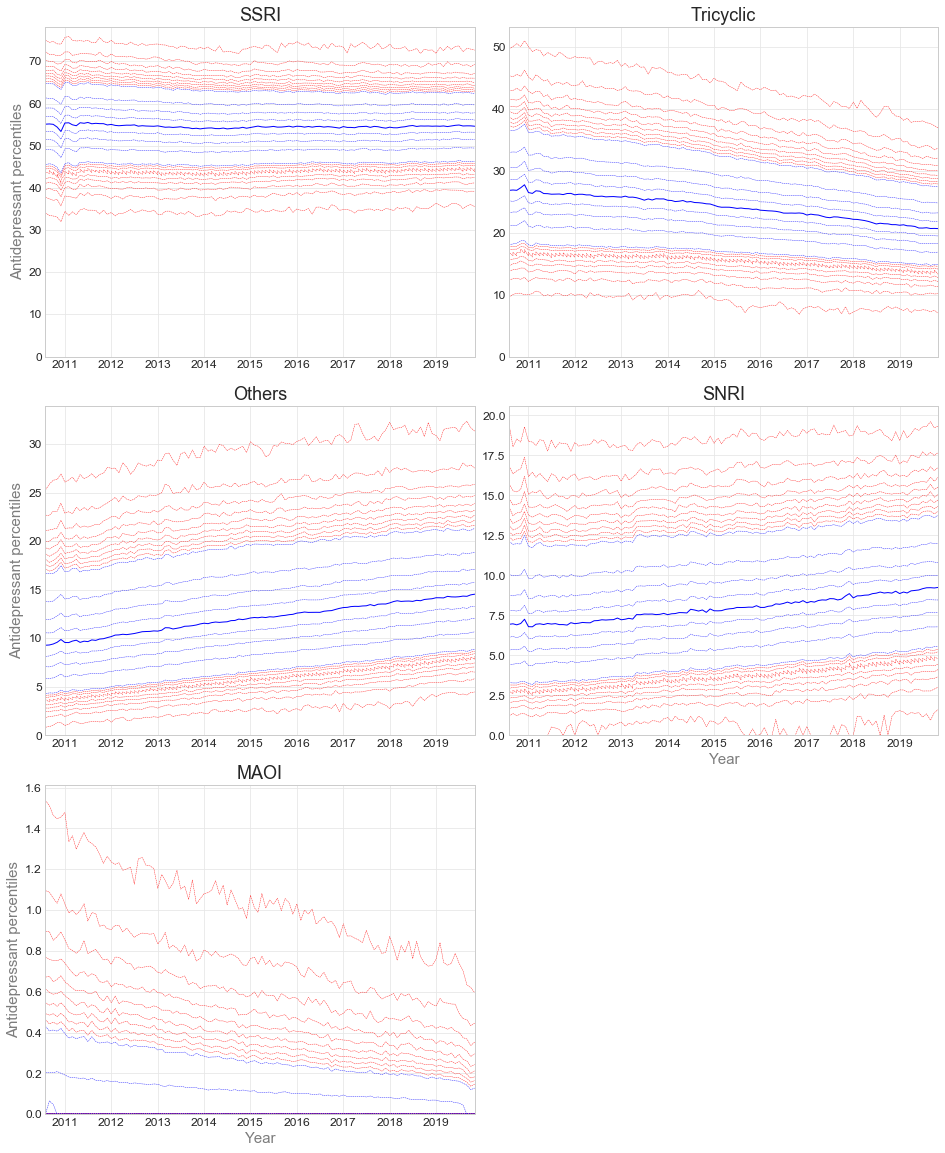

In [16]:
# Time series charts for drug classes

import matplotlib.pyplot as plt
import datetime
import matplotlib.gridspec as gridspec
import seaborn as sns

sns.set_style("whitegrid",{'grid.color': '.9'})
dfp = pc.sort_values(by=["Month","Medication"])
dfp['Month'] = dfp['Month'].astype(str)

# set format for dates:

dfp['Dates'] = [datetime.datetime.strptime(date, '%Y-%m-%d').date() for date in dfp['Month']]

# Set sort order and grid reference points for each subplot:

s = [(0,"SSRI",0,0), (1,"Tricyclic",0,1), (2,"Others",1,0), (3,"SNRI",1,1), (4,"MAOI",2,0)] 

# Specify index for plotting

perc = list(range(1,10)) + list([i for i in range(10,90) if i%10==0]) + list(range(90,100))

# Grid layout for subplots

fig = plt.figure(figsize=(16,20)) 
gs = gridspec.GridSpec(3,2) 

# Plot each subplot using a loop

for i in s:
    ax = plt.subplot(gs[i[2], i[3]])  # position of subplot in grid using coordinates listed in s
    for decile in perc:   # plot each decile line
        data = dfp.loc[(dfp['Medication']==i[1]) & (dfp['Index']==decile)]
        if decile == 50:
            ax.plot(data["Dates"],data['Value'],'b-',linewidth=1)
        elif decile in range(1,10):
            ax.plot(data["Dates"],data['Value'],'r--',linewidth=0.4)
        elif decile in range (91,100):
            ax.plot(data["Dates"],data['Value'],'r--',linewidth=0.4)
        else:
            ax.plot(data["Dates"],data['Value'],'b--',linewidth=0.4)
    if i[2]==2 and i[3]==0:
        ax.set_xlabel('Year',size=15,alpha=0.6)
    elif i[2]==1 and i[3]==1:
        ax.set_xlabel('Year',size=15,alpha=0.6)
    else:
        ax.set_xlabel('')
    if  i[3]%2==0:    # set y axis title only for charts in leftmost column
        ax.set_ylabel('Antidepressant percentiles', size =15, alpha=0.6)
    ax.set_title(i[1],size = 18)
    plt.gca().set_ylim(bottom=0)
#     ax.set_ylim([0, dfp['Value'].max()*1.05])  # set ymax across all subplots as largest value across dataset
    ax.tick_params(labelsize=12)
    ax.set_xlim([dfp['Dates'].min(), dfp['Dates'].max()]) # set x axis range as full date range

plt.subplots_adjust(wspace = 0.08,hspace = 0.15)
plt.savefig("/Users/paulbogowicz/Documents/Research/Oxford University/OpenPrescribing - antidepressants/Figures/Figure 4.pdf",format="pdf",bbox_inches='tight')

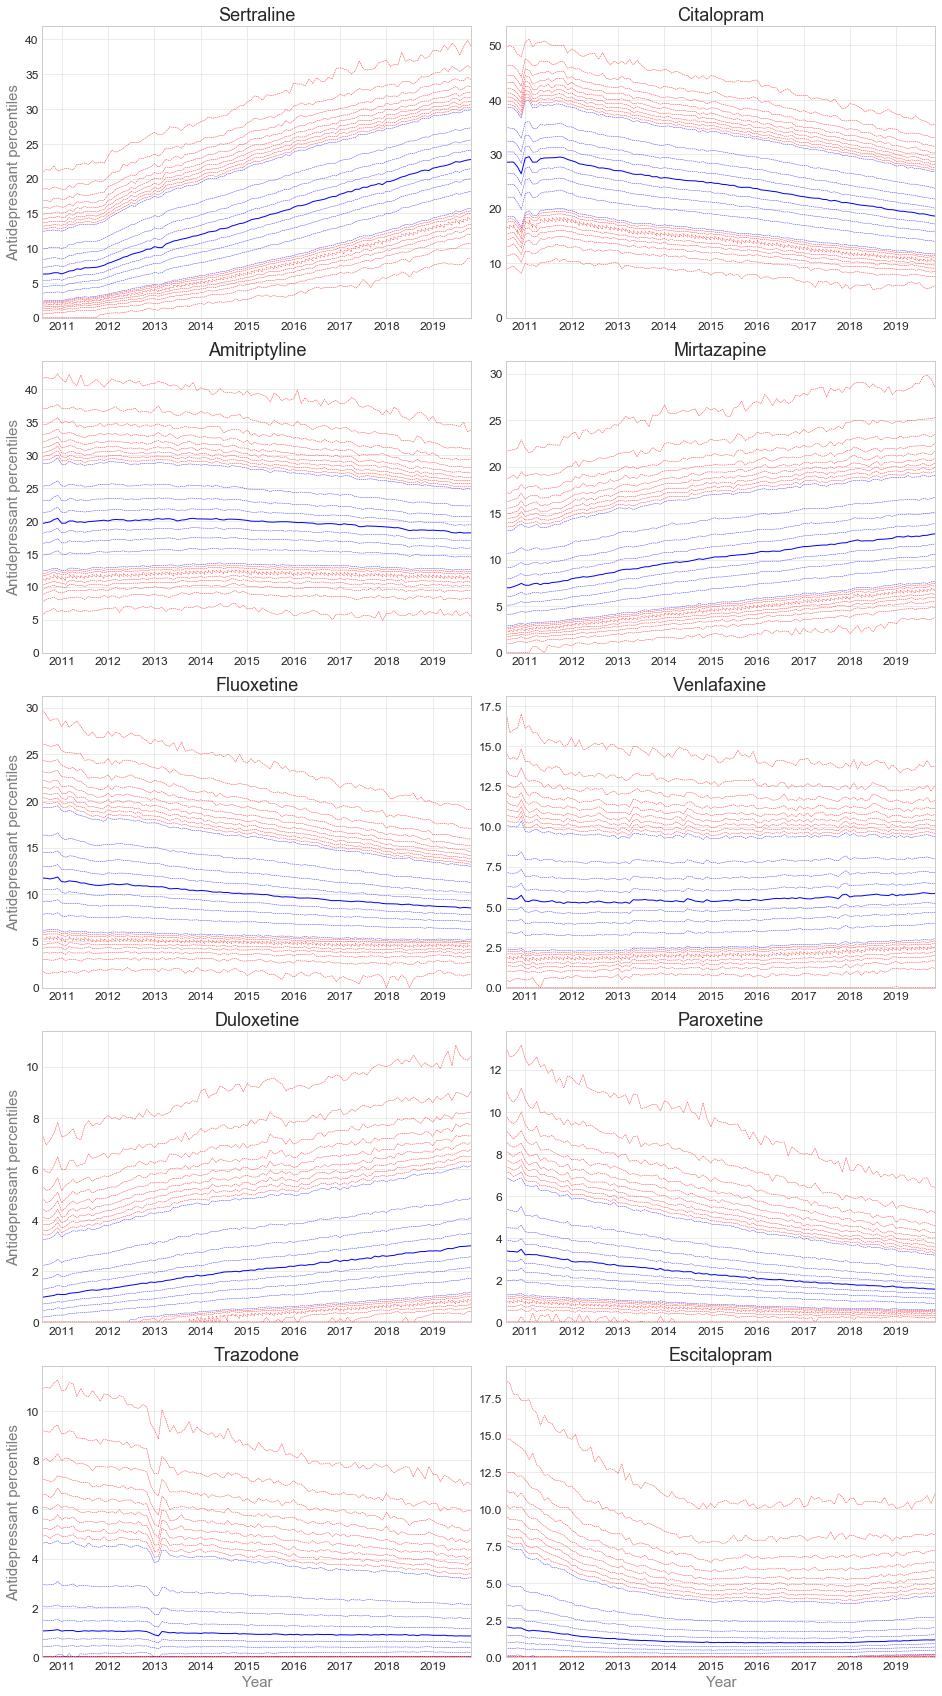

In [22]:
# Time series charts for top 10 most prescribed drugs (2018)

# Set sort order and grid reference points for each subplot:

s = [(0,"Sertraline",0,0), (1,"Citalopram",0,1), (2,"Amitriptyline",1,0), (3,"Mirtazapine",1,1), (4,"Fluoxetine",2,0),(5,"Venlafaxine",2,1),(6,"Duloxetine",3,0),(7,"Paroxetine",3,1),(8,"Trazodone",4,0),(9,"Escitalopram",4,1)] 

# Specify index for plotting

perc = list(range(1,10)) + list([i for i in range(10,90) if i%10==0]) + list(range(90,100))

# Grid layout for subplots

fig = plt.figure(figsize=(16,30)) 
gs = gridspec.GridSpec(5,2) 

# Plot each subplot using a loop

for i in s:
    ax = plt.subplot(gs[i[2], i[3]])  # position of subplot in grid using coordinates listed in s
    for decile in perc:   # plot each decile line
        data = dfp.loc[(dfp['Medication']==i[1]) & (dfp['Index']==decile)]
        if decile == 50:
            ax.plot(data["Dates"],data['Value'],'b-',linewidth=1)
        elif decile in range(1,10):
            ax.plot(data["Dates"],data['Value'],'r--',linewidth=0.4)
        elif decile in range (91,100):
            ax.plot(data["Dates"],data['Value'],'r--',linewidth=0.4)
        else:
            ax.plot(data["Dates"],data['Value'],'b--',linewidth=0.4)
    if  i[3]%2==0:    # set y axis title only for charts in leftmost column
        ax.set_ylabel('Antidepressant percentiles', size =15, alpha=0.6)
    if i[2]==4:
        ax.set_xlabel('Year',size=15,alpha=0.6)
    ax.set_title(i[1],size = 18)
    plt.gca().set_ylim(bottom=0)
#     ax.set_ylim([0, 55])  # set ymax manually
    ax.tick_params(labelsize=12)
    ax.set_xlim([dfp['Dates'].min(), dfp['Dates'].max()]) # set x axis range as full date range

plt.subplots_adjust(wspace = 0.08,hspace = 0.15)
plt.savefig("/Users/paulbogowicz/Documents/Research/Oxford University/OpenPrescribing - antidepressants/Figures/Figure S3.pdf",format="pdf",bbox_inches='tight')

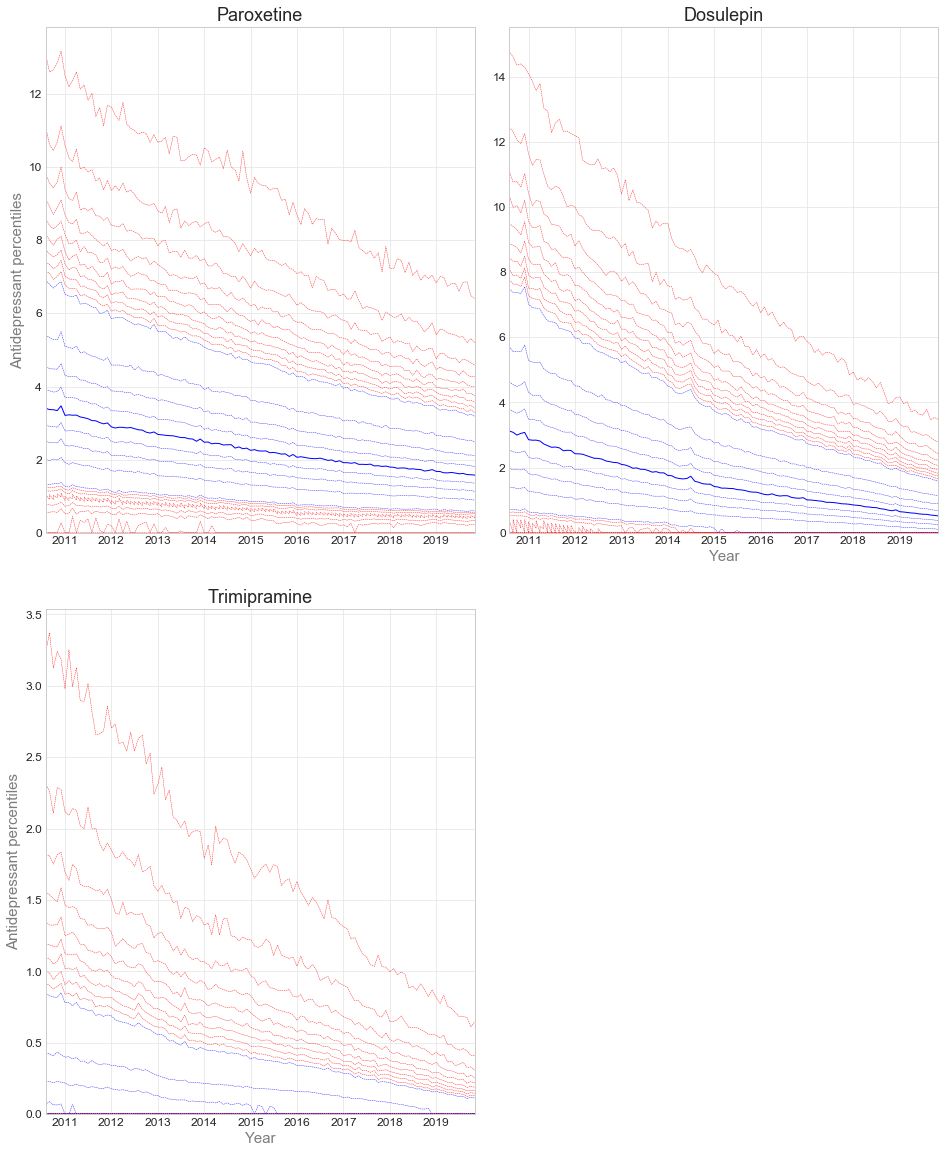

In [20]:
# Time series charts for medications that should generally be avoided

# Set sort order and grid reference points for each subplot:

s = [(0,"Paroxetine",0,0), (1,"Dosulepin",0,1), (2,"Trimipramine",1,0)]

# Specify index for plotting

perc = list(range(1,10)) + list([i for i in range(10,90) if i%10==0]) + list(range(90,100))

# Grid layout for subplots

fig = plt.figure(figsize=(16,20)) 
gs = gridspec.GridSpec(2,2) 

# Plot each subplot using a loop

for i in s:
    ax = plt.subplot(gs[i[2], i[3]])  # position of subplot in grid using coordinates listed in s
    for decile in perc:   # plot each decile line
        data = dfp.loc[(dfp['Medication']==i[1]) & (dfp['Index']==decile)]
        if decile == 50:
            ax.plot(data["Dates"],data['Value'],'b-',linewidth=1)
        elif decile in range(1,10):
            ax.plot(data["Dates"],data['Value'],'r--',linewidth=0.4)
        elif decile in range (91,100):
            ax.plot(data["Dates"],data['Value'],'r--',linewidth=0.4)
        else:
            ax.plot(data["Dates"],data['Value'],'b--',linewidth=0.4)
    if i[2]==1 and i[3]==0:
        ax.set_xlabel('Year',size=15,alpha=0.6)
    elif i[2]==0 and i[3]==1:
        ax.set_xlabel('Year',size=15,alpha=0.6)
    else:
        ax.set_xlabel('')
    if  i[3]%2==0:    # set y axis title only for charts in leftmost column
        ax.set_ylabel('Antidepressant percentiles', size =15, alpha=0.6)
    ax.set_title(i[1],size = 18)
    plt.gca().set_ylim(bottom=0)
#     ax.set_ylim([0, 15]) # set ymax manually 
    ax.tick_params(labelsize=12)
    ax.set_xlim([dfp['Dates'].min(), dfp['Dates'].max()]) # set x axis range as full date range

plt.subplots_adjust(wspace = 0.08,hspace = 0.15)
plt.savefig("/Users/paulbogowicz/Documents/Research/Oxford University/OpenPrescribing - antidepressants/Figures/Figure 5.pdf",format="pdf",bbox_inches='tight')


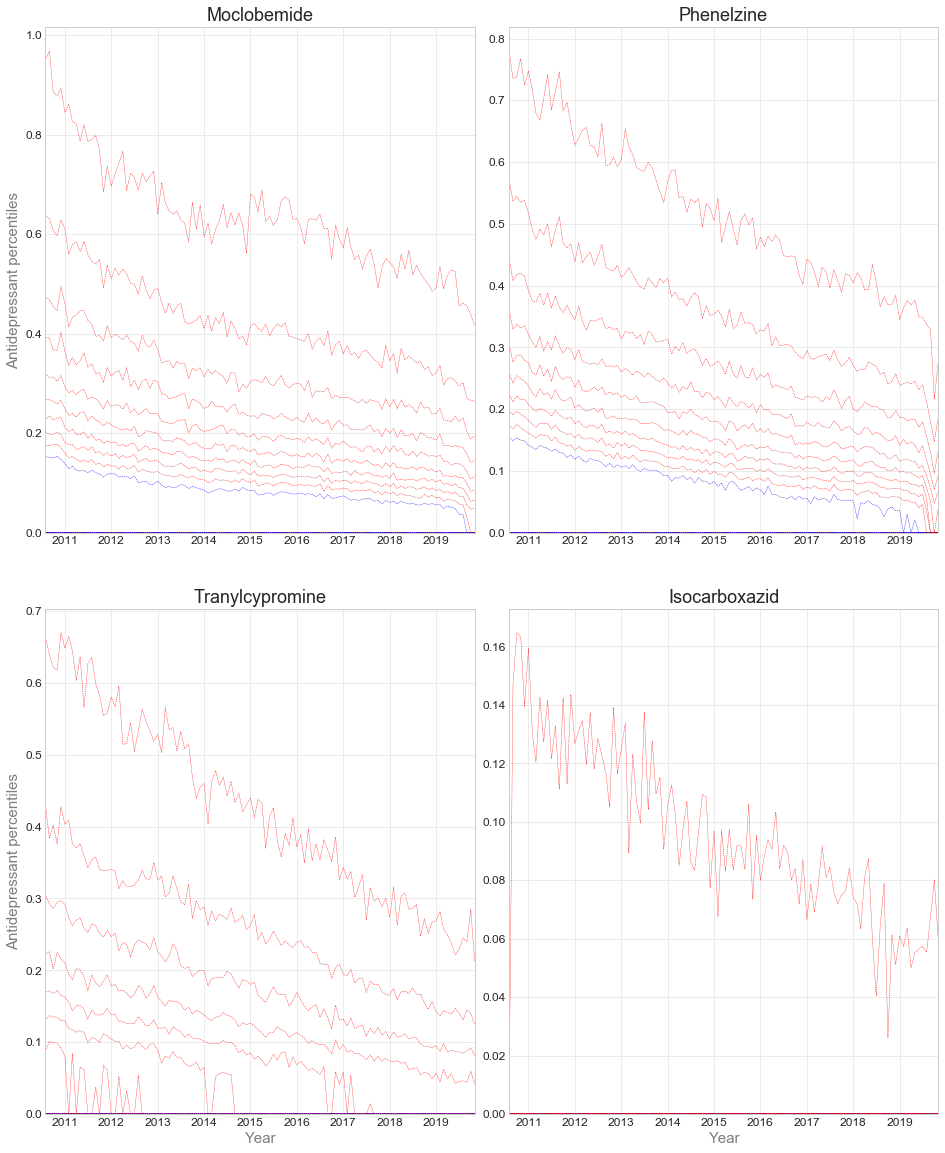

In [23]:
# Time series charts for MAOIs

# Set sort order and grid reference points for each subplot:

s = [(0,"Moclobemide",0,0), (1,"Phenelzine",0,1), (2,"Tranylcypromine",1,0), (3,"Isocarboxazid",1,1)] # Iproniazid excluded as no prescribed items included in dataset

# Specify index for plotting

perc = list(range(1,10)) + list([i for i in range(10,90) if i%10==0]) + list(range(90,100))

# Grid layout for subplots

fig = plt.figure(figsize=(16,20)) 
gs = gridspec.GridSpec(2,2) 

# Plot each subplot using a loop

for i in s:
    ax = plt.subplot(gs[i[2], i[3]])  # position of subplot in grid using coordinates listed in s
    for decile in perc:   # plot each decile line
        data = dfp.loc[(dfp['Medication']==i[1]) & (dfp['Index']==decile)]
        if decile == 50:
            ax.plot(data["Dates"],data['Value'],'b-',linewidth=1)
        elif decile in range(1,10):
            ax.plot(data["Dates"],data['Value'],'r--',linewidth=0.4)
        elif decile in range (91,100):
            ax.plot(data["Dates"],data['Value'],'r--',linewidth=0.4)
        else:
            ax.plot(data["Dates"],data['Value'],'b--',linewidth=0.4)
    if i[2]==1:
        ax.set_xlabel('Year',size=15,alpha=0.6)
    if  i[3]%2==0:    # set y axis title only for charts in leftmost column
        ax.set_ylabel('Antidepressant percentiles', size =15, alpha=0.6)
    ax.set_title(i[1],size = 18)
    plt.gca().set_ylim(bottom=0)
#     ax.set_ylim([0, 55])  # set ymax manually
    ax.tick_params(labelsize=12)
    ax.set_xlim([dfp['Dates'].min(), dfp['Dates'].max()]) # set x axis range as full date range

plt.subplots_adjust(wspace = 0.08,hspace = 0.15)
plt.savefig("/Users/paulbogowicz/Documents/Research/Oxford University/OpenPrescribing - antidepressants/Figures/Figure S4.pdf",format="pdf",bbox_inches='tight')